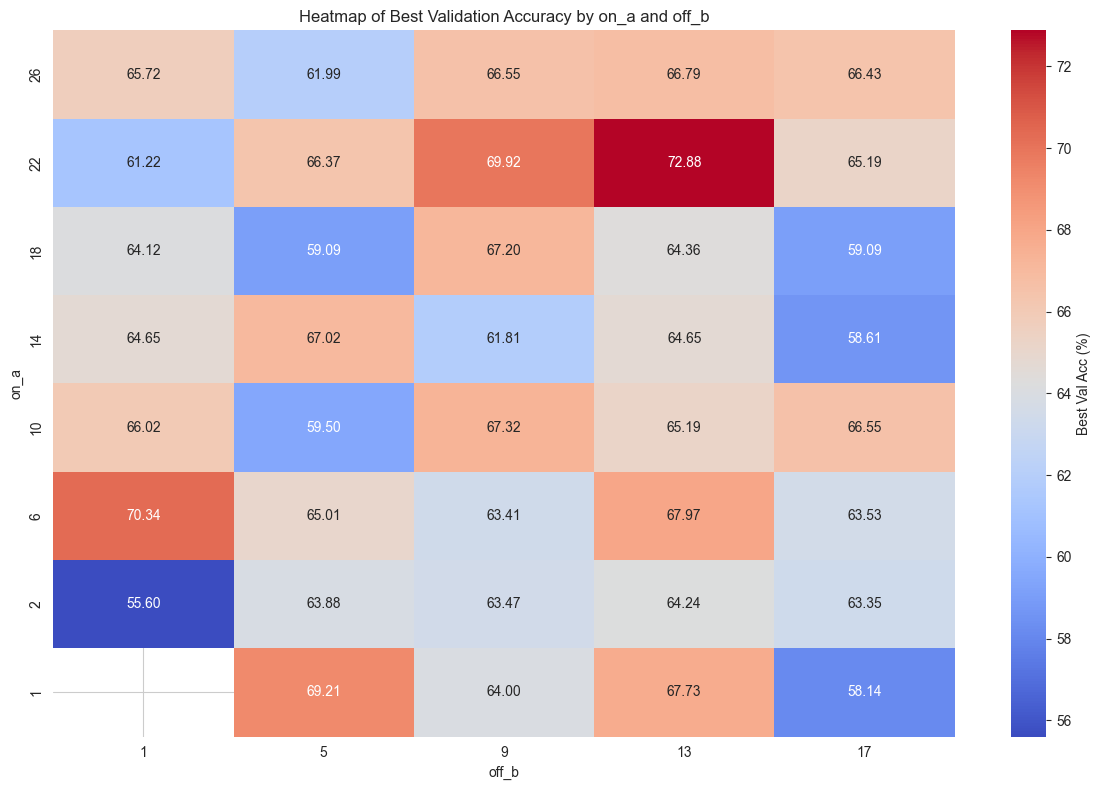

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the log with two parameters: on_a and off_b
file_path = "2025-06-11_20-47-56.log"
with open(file_path, "r") as file:
    log_data = file.read()

# Extract on_a, off_b, and Best val acc
pattern = r"Filtered with filter Zig Zag Kernel with parameters: on_a = (\d+) off_b = (\d+).*?Best val acc: (\d+\.\d+)%"
matches = re.findall(pattern, log_data, re.DOTALL)

# Create DataFrame
data_zigzag = pd.DataFrame(matches, columns=["on_a", "off_b", "best_val_acc"])
data_zigzag = data_zigzag.astype({"on_a": int, "off_b": int, "best_val_acc": float})

# Pivot for heatmap
heatmap_data = data_zigzag.pivot_table(index="on_a", columns="off_b", values="best_val_acc", aggfunc="max")
heatmap_data_sorted = heatmap_data.sort_index(ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_sorted, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Best Val Acc (%)'})
plt.title("Heatmap of Best Validation Accuracy by on_a and off_b")
plt.xlabel("off_b")
plt.ylabel("on_a")
plt.tight_layout()
plt.show()
